In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
# turn off pink boxes for demo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
from acquire import get_telco_data
from prepare import split_telco_data
from prepare import prep_telco

## Telco Data set is now defined as DF

# Plan

### SUMMARY

Codeup Data Science Team has requested a further exploration & understanding into Churn in the Telco Data set.

They have requested that we find drivers for customer churn at Telco. Why are customers churning?

1) what are the main drivers of churn?

2) follow the bread crums that drive churn and make visuals?

3) what services have the highest churn levels?

### GOALS

Project goals:

1) Identify Churn drivers 

2) Creating a detailed Readme.md file to guide the reader into a further analysis of the data.

3) a CSV file that predicts churn.

4) .py files that go into detail with how the data was prepared and cut.

### ACQUIRE

In [2]:
df = get_telco_data()
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [3]:
train, validate, test = prep_telco(df)
train

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,dependents,tenure,multiple_lines,tech_support,...,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,1,4,2,8331-ZXFOE,Female,0,No,58,Yes,Yes,...,4299.20,No,0,0,0,1,0,1,1,0
1915,2,4,2,2790-XUYMV,Male,0,Yes,71,Yes,No,...,6028.95,No,1,1,0,1,0,0,1,0
5054,3,1,1,7107-UBYKY,Female,0,Yes,35,Yes,No internet service,...,882.55,No,0,1,0,1,1,0,1,0
2355,3,2,1,3373-YZZYM,Male,0,Yes,1,No,No internet service,...,19.20,No,1,1,0,0,1,0,0,0
6279,1,2,2,8883-GRDWQ,Male,1,No,20,No,Yes,...,1055.90,No,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2,4,1,0581-MDMPW,Female,0,No,24,Yes,No,...,2072.75,No,0,0,0,1,0,0,1,0
3763,2,1,1,5299-RULOA,Female,0,Yes,10,Yes,No,...,1064.65,Yes,0,1,0,1,0,0,1,1
3444,3,4,3,4883-KCPZJ,Female,0,Yes,22,Yes,No internet service,...,555.40,No,0,1,0,1,1,0,0,0
1002,2,4,1,1452-KIOVK,Male,0,Yes,22,Yes,No,...,1949.40,No,1,1,0,1,0,0,1,0


# Prepare

## Preparing data

#### Using functions from prepare.py

- we have removed the null values 
- replaced yes and no values with 1 and 0 for the data to be processed and analized correctly 
- data from internet, service and payment type have been transformed and defined below
- data has also been split for testing and statistical predcitions 

### Gender to gender_Male: 1 = Male, 0 = Female

In [4]:
pd.crosstab(df.gender, train.gender_Male)

gender_Male,0,1
gender,,
Female,1961,0
Male,0,1976


### Churn to churn_Yes:  1 = has churn, 0 = no churn

In [5]:
pd.crosstab(train.churn_Yes, df.churn)

churn,No,Yes
churn_Yes,,
0,2891,0
1,0,1046


### Internet Service type: 1 = DSL, 2 = Fiber optic, 3 = None 

In [6]:
pd.crosstab(df.internet_service_type,df.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


### Contract type: 1 = Month-to-month, 2 = One year, 3 = Two year

In [7]:
pd.crosstab(df.contract_type,df.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


### Payment Type: 1 = Electronic check, 2 = Mailed check, 3 = Bank transfer (automatic), 4 = Credit card (automatic)

In [8]:
pd.crosstab(df.payment_type,df.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


### Senior citizen: 0 = Not a senior citizen 1 = is a senior citizen

In [9]:
pd.crosstab(df.senior_citizen,train.senior_citizen)

senior_citizen,0,1
senior_citizen,,
0,3302,0
1,0,635


In [10]:
train = train.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing'])

train = train.replace({'Yes':1, 'No':0})

validate = validate.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing',])

validate = validate.replace({'Yes':1, 'No':0})


In [11]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn','churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn','churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn','churn_Yes'])
y_test = test.churn_Yes

# Data Exploration

In [12]:
train

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,1,4,2,0,58,71.10,4299.20,0,0,0,0,1,0,1,1,0
1915,2,4,2,0,71,85.45,6028.95,0,1,1,0,1,0,0,1,0
5054,3,1,1,0,35,25.75,882.55,0,0,1,0,1,1,0,1,0
2355,3,2,1,0,1,19.20,19.20,0,1,1,0,0,1,0,0,0
6279,1,2,2,1,20,54.00,1055.90,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2,4,1,0,24,88.95,2072.75,0,0,0,0,1,0,0,1,0
3763,2,1,1,0,10,100.25,1064.65,1,0,1,0,1,0,0,1,1
3444,3,4,3,0,22,25.25,555.40,0,0,1,0,1,1,0,0,0
1002,2,4,1,0,22,89.10,1949.40,0,1,1,0,1,0,0,1,0


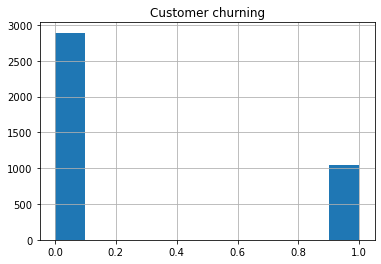

number of customers churning per month: 1046 


In [13]:
plt.title("Customer churning")
train.churn_Yes.hist()
plt.show()
print("number of customers churning per month: 1046 ")

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   internet_service_type_id          3937 non-null   int64  
 1   payment_type_id                   3937 non-null   int64  
 2   contract_type_id                  3937 non-null   int64  
 3   senior_citizen                    3937 non-null   int64  
 4   tenure                            3937 non-null   int64  
 5   monthly_charges                   3937 non-null   float64
 6   total_charges                     3937 non-null   float64
 7   churn                             3937 non-null   int64  
 8   gender_Male                       3937 non-null   uint8  
 9   dependents_Yes                    3937 non-null   uint8  
 10  multiple_lines_No phone service   3937 non-null   uint8  
 11  multiple_lines_Yes                3937 non-null   uint8  
 12  tec

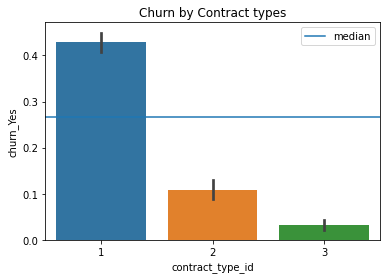

Contract type: 1 = Month-to-month, 2 = One year, 3 = Two year


churn_Yes,0,1
contract_type_id,,
1,1238,927
2,726,89
3,927,30


In [15]:
plt.title("Churn by Contract types")
sns.barplot(x="contract_type_id", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="median")
plt.legend()
plt.show()
print("Contract type: 1 = Month-to-month, 2 = One year, 3 = Two year")
pd.crosstab(train.contract_type_id, train.churn_Yes)

- Take away: Month to month seems to have large churn rates

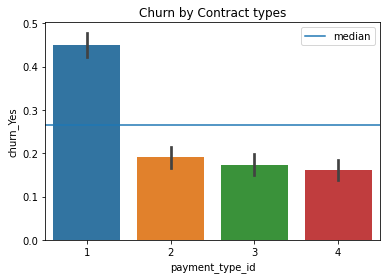

Payment Type: 1 = Electronic check, 2 = Mailed check, 3 = Bank transfer (automatic), 4 = Credit card (automatic)


churn_Yes,0,1
payment_type_id,,
1,708,581
2,720,171
3,713,149
4,750,145


In [16]:
plt.title("Churn by Contract types")
sns.barplot(x="payment_type_id", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="median")
plt.legend()
plt.show(),

print("Payment Type: 1 = Electronic check, 2 = Mailed check, 3 = Bank transfer (automatic), 4 = Credit card (automatic)")
pd.crosstab(train.payment_type_id, train.churn_Yes)

- Take away: Electronic check has the highest churn rates out of the 4 contract types

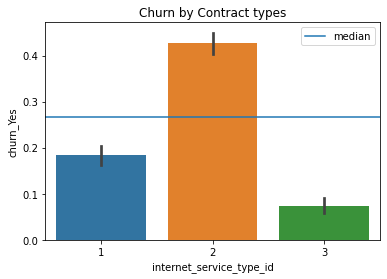

Internet Service type: 1 = DSL, 2 = Fiber optic, 3 = None


churn_Yes,0,1
internet_service_type_id,,
1,1101,247
2,987,735
3,803,64


In [17]:
plt.title("Churn by Contract types")
sns.barplot(x="internet_service_type_id", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="median")
plt.legend()
plt.show(),

print("Internet Service type: 1 = DSL, 2 = Fiber optic, 3 = None")
pd.crosstab(train.internet_service_type_id, train.churn_Yes)

- Take away: Fiber optic has a high churn rate.

## Summary of Take aways 

#### Average number of customers churning is 1046
#### Month to month seems to have large churn rates
#### Electronic check has the highest churn rates out of the 4 contract types
#### Electronic check has the highest churn rates out of the 4 contract types
#### Fiber optic has a high churn rate

In [18]:
train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [123]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
baseline_accuracy = (train.churn_Yes == 0).mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [124]:
clf = clf.fit(X_train, y_train)

In [125]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)


In [126]:
train

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,1,4,2,0,58,71.10,4299.20,0,0,0,0,1,0,1,1,0
1915,2,4,2,0,71,85.45,6028.95,0,1,1,0,1,0,0,1,0
5054,3,1,1,0,35,25.75,882.55,0,0,1,0,1,1,0,1,0
2355,3,2,1,0,1,19.20,19.20,0,1,1,0,0,1,0,0,0
6279,1,2,2,1,20,54.00,1055.90,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2,4,1,0,24,88.95,2072.75,0,0,0,0,1,0,0,1,0
3763,2,1,1,0,10,100.25,1064.65,1,0,1,0,1,0,0,1,1
3444,3,4,3,0,22,25.25,555.40,0,0,1,0,1,1,0,0,0
1002,2,4,1,0,22,89.10,1949.40,0,1,1,0,1,0,0,1,0


[Text(388.91736273364484, 359.38, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(214.50569509345794, 317.09999999999997, 'monthly_charges <= 69.225\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(126.9026285046729, 274.82, 'internet_service_type_id <= 2.5\ngini = 0.408\nsamples = 954\nvalue = [682, 272]\nclass = 0'),
 Text(57.62523364485981, 232.53999999999996, 'monthly_charges <= 48.775\ngini = 0.449\nsamples = 635\nvalue = [419, 216]\nclass = 0'),
 Text(30.507476635514017, 190.26, 'monthly_charges <= 45.025\ngini = 0.489\nsamples = 265\nvalue = [152, 113]\nclass = 0'),
 Text(13.558878504672897, 147.97999999999996, 'monthly_charges <= 44.775\ngini = 0.479\nsamples = 206\nvalue = [124, 82]\nclass = 0'),
 Text(6.779439252336449, 105.69999999999999, 'monthly_charges <= 23.8\ngini = 0.485\nsamples = 189\nvalue = [111, 78]\nclass = 0'),
 Text(3.3897196261682243, 63.41999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

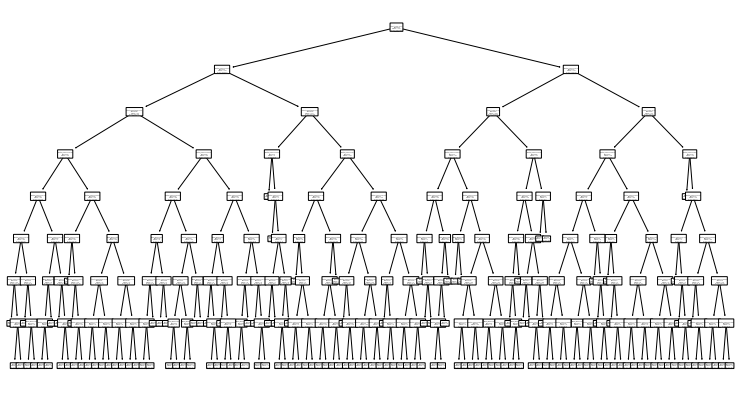

In [153]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [154]:
baseline_prediction = y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.89221557, 0.10778443],
       [0.89221557, 0.10778443],
       [0.90909091, 0.09090909],
       [1.        , 0.        ],
       [0.93693694, 0.06306306]])

In [155]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [156]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2891
           1       0.63      0.60      0.61      1046

    accuracy                           0.80      3937
   macro avg       0.74      0.74      0.74      3937
weighted avg       0.80      0.80      0.80      3937



In [157]:
confusion_matrix(y_train, y_pred)

array([[2519,  372],
       [ 417,  629]])

In [158]:
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,2519,372
1,417,629


In [159]:
y_pred = clf.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2891
           1       0.63      0.60      0.61      1046

    accuracy                           0.80      3937
   macro avg       0.74      0.74      0.74      3937
weighted avg       0.80      0.80      0.80      3937



In [160]:
churn_pred_prob = pd.DataFrame(clf.predict_proba(X_train))
churn_pred_prob

,0,1
0,0.892216,0.107784
1,0.892216,0.107784
2,0.909091,0.090909
3,1.000000,0.000000
4,0.936937,0.063063
...,...,...
3932,0.600000,0.400000
3933,0.472973,0.527027
3934,0.978852,0.021148
3935,0.600000,0.400000


In [161]:

TP = 2699
FP = 192
FN = 631
TN = 415
ALL = TP + FP + FN + TN
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")
false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")
true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")
false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")
precision = TP/(TP+FP)
print(f"Precision: {precision}")
recall = TP/(TP+FN)
print(f"Recall: {recall}")
f1_score = 2* (precision*recall)/ (precision+recall)
print (f"Fl_Score: {f1_score}")
support_pos = TP + FN
print ("Support (0): {support_pos}")
support_neg = FP + TN
print (f"Support (1): {support_neg}")

Accuracy: 0.7909575819151639
True Positive Rate: 0.8105105105105105
False Positive Rate: 0.3163097199341021
True Negative Rate: 0.6836902800658978
False Negative Rate: 0.1894894894894895
Precision: 0.9335869941196818
Recall: 0.8105105105105105
Fl_Score: 0.8677061565664684
Support (0): {support_pos}
Support (1): 607


In [162]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2519,372
1,417,629


In [163]:
clf = DecisionTreeClassifier(max_depth=8, random_state=123)
clf = clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
# confusion matrix

confusion_matrix(y_train, y_pred)

Accuracy of Decision Tree classifier on training set: 0.80


array([[2519,  372],
       [ 417,  629]])

In [164]:
x = clf.score(X_validate,y_validate)
x

ValueError: X has 14 features, but DecisionTreeClassifier is expecting 4 features as input.

In [148]:
y = clf.score(X_validate,y_validate)
y

ValueError: X has 14 features, but DecisionTreeClassifier is expecting 4 features as input.

In [149]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [150]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


In [151]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2891
           1       0.63      0.60      0.61      1046

    accuracy                           0.80      3937
   macro avg       0.74      0.74      0.74      3937
weighted avg       0.80      0.80      0.80      3937



In [152]:
y_pred = rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2891
           1       0.72      0.66      0.69      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.78      0.79      3937
weighted avg       0.84      0.84      0.84      3937



In [100]:
confusion_matrix(y_train, y_pred)

array([[2615,  276],
       [ 352,  694]])

In [101]:
TP = 2743
FP = 148
FN = 280
TN = 766
ALL = TP + FP + FN + TN
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")
false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")
true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")
false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")
precision = TP/(TP+FP)
print(f"Precision: {precision}")
recall = TP/(TP+FN)
print(f"Recall: {recall}")
f1_score = 2* (precision*recall)/ (precision+recall)
print (f"Fl_Score: {f1_score}")
support_pos = TP + FN
print ("Support (0): {support_pos}")
support_neg = FP + TN
print (f"Support (1): {support_neg}")

Accuracy: 0.8912877825755652
True Positive Rate: 0.9073767780350646
False Positive Rate: 0.16192560175054704
True Negative Rate: 0.838074398249453
False Negative Rate: 0.0926232219649355
Precision: 0.948806641300588
Recall: 0.9073767780350646
Fl_Score: 0.9276293540750762
Support (0): {support_pos}
Support (1): 914


----------------------------------------------------------------------------------------------------------------------

In [102]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [103]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [104]:
print(confusion_matrix(y_train, y_pred))

[[2615  276]
 [ 423  623]]


In [105]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2891
           1       0.69      0.60      0.64      1046

    accuracy                           0.82      3937
   macro avg       0.78      0.75      0.76      3937
weighted avg       0.82      0.82      0.82      3937



In [106]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

ValueError: query data dimension must match training data dimension

In [107]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [108]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.80


In [109]:
print(confusion_matrix(y_train, y_pred))

[[2649  242]
 [ 556  490]]


In [110]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.80


In [51]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.78


In [52]:
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.78


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   internet_service_type_id          3937 non-null   int64  
 1   payment_type_id                   3937 non-null   int64  
 2   contract_type_id                  3937 non-null   int64  
 3   senior_citizen                    3937 non-null   int64  
 4   tenure                            3937 non-null   int64  
 5   monthly_charges                   3937 non-null   float64
 6   total_charges                     3937 non-null   float64
 7   churn                             3937 non-null   int64  
 8   gender_Male                       3937 non-null   uint8  
 9   dependents_Yes                    3937 non-null   uint8  
 10  multiple_lines_No phone service   3937 non-null   uint8  
 11  multiple_lines_Yes                3937 non-null   uint8  
 12  tec

In [54]:
features = ['internet_service_type_id', 'contract_type_id','monthly_charges','gender_Male']

In [55]:
logit = LogisticRegression(random_state=123)

In [56]:
logit = logit.fit(X_train[features], y_train)

In [57]:
baseline = (train.churn == 0).mean()
baseline

0.7343154686309372

In [58]:
X_train = X_train[features]
logit.score(X_train,y_train)

0.7447294894589789